In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df=pd.read_csv("medical_insurance.csv")
df.sample(5)


,age,sex,bmi,children,smoker,region,charges
1359,19,female,23.400,2,no,southwest,2913.56900
1257,54,female,27.645,1,no,northwest,11305.93455
2273,36,female,30.020,0,no,northwest,5272.17580
564,18,female,32.120,2,no,southeast,2801.25880
691,47,male,36.200,1,no,southwest,8068.18500


# Understanding the Data

In [5]:
# How big the data is?

df.shape

(2772, 7)

In [6]:
# How does the looks like?

df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1935,43,female,46.200,0,yes,southeast,45863.20500
2426,35,female,28.025,0,yes,northwest,20234.85475
1437,21,female,33.630,2,no,northwest,3579.82870
2664,39,male,29.925,1,yes,northeast,22462.04375
2476,47,male,36.190,0,yes,southeast,41676.08110


In [7]:
# What are the datatypes of the Columns?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [8]:
# How does the looks like mathmatically? 

df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# Is there any missing value?>

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# Is there any duplicate value?

df.duplicated().sum()

1435

In [11]:
# As we have 1435 duplicate rows, we must drop them.

df.drop_duplicates(inplace=True)

In [12]:
df.shape

(1337, 7)

# Exploratory Data Analysis-EDA

## Univariate-Categorical Columns

###  "sex" Column 

In [13]:
# Frequency of the values

df["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

<Axes: xlabel='sex'>

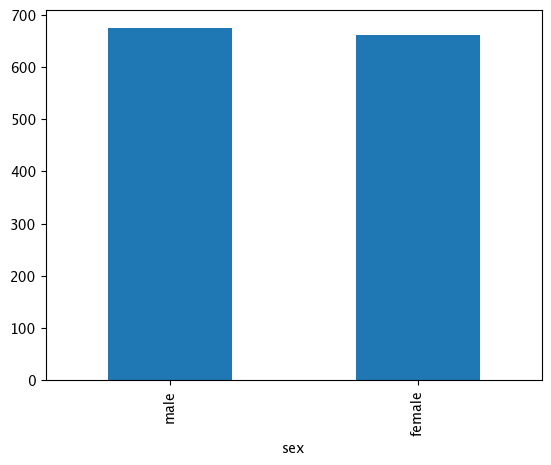

In [14]:
df["sex"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

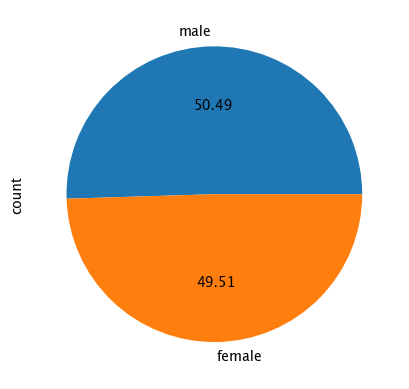

In [15]:
df["sex"].value_counts().plot(kind="pie", autopct="%.2f")

### "smoker" column

In [16]:
df["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker'>

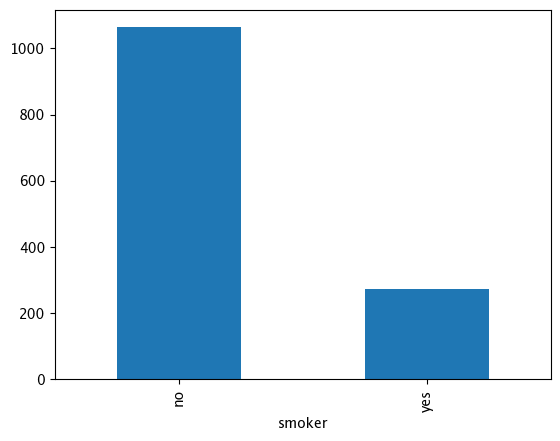

In [17]:
df["smoker"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

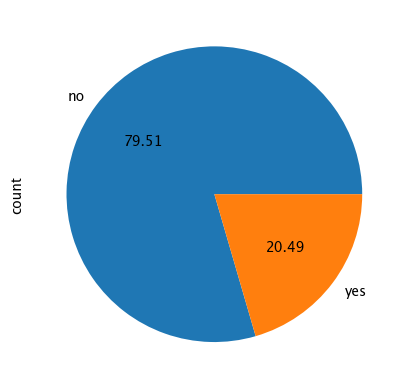

In [18]:
df["smoker"].value_counts().plot(kind="pie", autopct="%.2f")

### "region" column

In [19]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

<Axes: xlabel='region'>

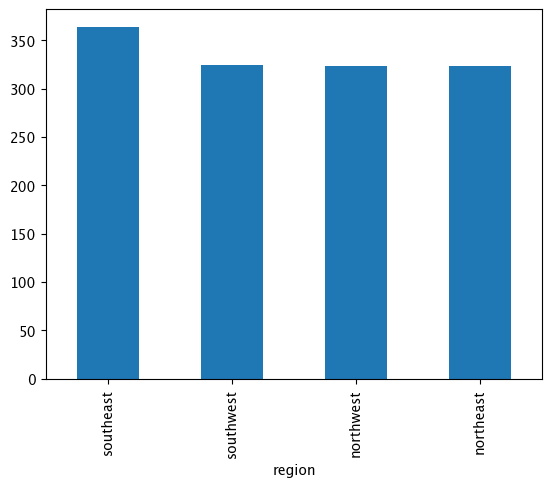

In [20]:
df["region"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

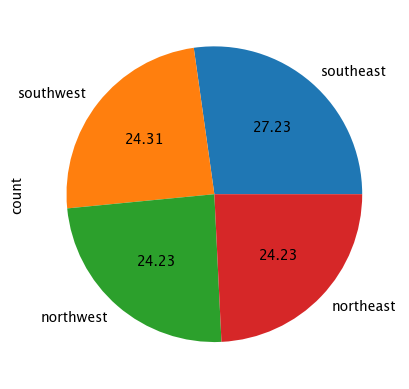

In [21]:
df["region"].value_counts().plot(kind="pie", autopct="%.2f")

## Univariate Analysis- Numerical Values

### "age" column

(array([221., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

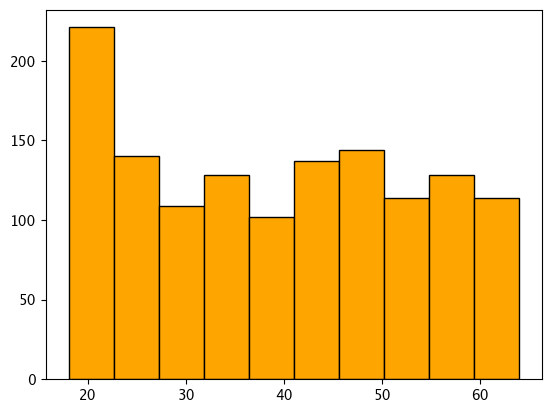

In [22]:
plt.hist(df["age"], bins=10, color="orange", edgecolor="black")

/var/folders/ff/ns12vyn5245d10w1rgcfkyqw0000gn/T/ipykernel_15690/2100297524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"], bins=10, color="orange")


<Axes: xlabel='age', ylabel='Density'>

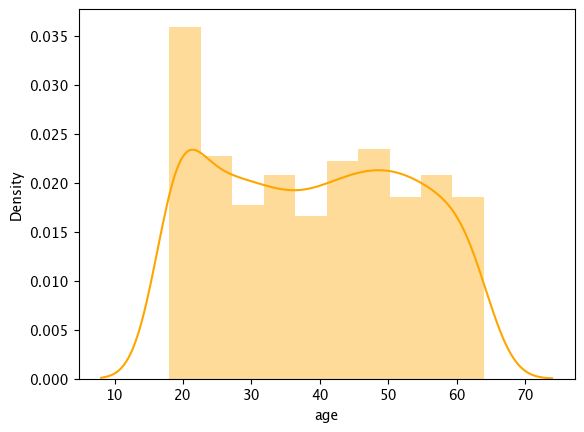

In [23]:
sns.distplot(df["age"], bins=10, color="orange")

{'whiskers': [<matplotlib.lines.Line2D at 0x1662385c0>,
 'caps': [<matplotlib.lines.Line2D at 0x16632c1a0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x16623acc0>],
 'medians': [<matplotlib.lines.Line2D at 0x16632c7a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16632ca40>],
 'means': []}

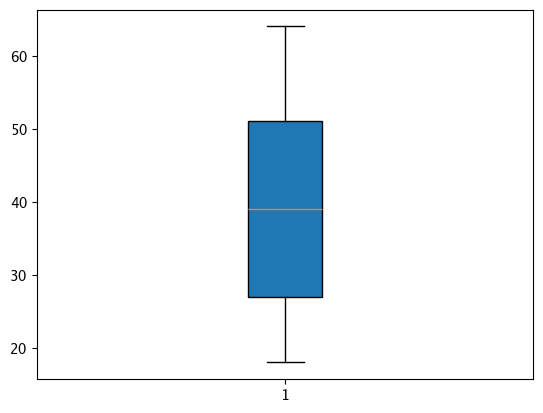

In [24]:
plt.boxplot(df["age"], patch_artist=True)

### "bmi" column

In [25]:
df["bmi"].describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x16636dd00>,
 'caps': [<matplotlib.lines.Line2D at 0x16636e2a0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x16636da60>],
 'medians': [<matplotlib.lines.Line2D at 0x16636e6f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16636ea20>],
 'means': []}

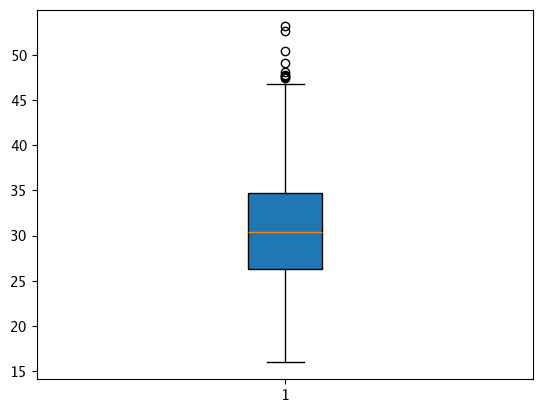

In [26]:
plt.boxplot(df["bmi"], patch_artist=True)

(array([ 67., 286., 436., 361., 147.,  35.,   5.]),
 array([15.96, 21.27, 26.58, 31.89, 37.2 , 42.51, 47.82, 53.13]),
 <BarContainer object of 7 artists>)

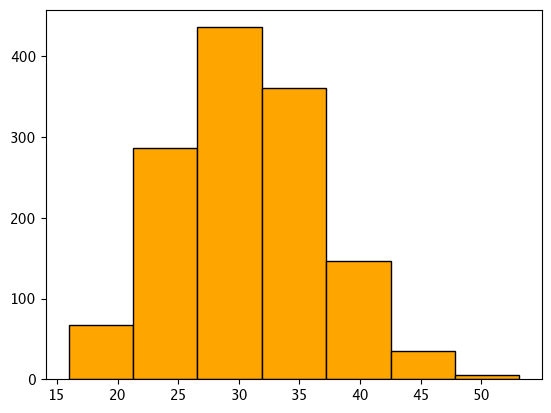

In [27]:
plt.hist(df["bmi"], bins=7, color="orange", edgecolor="black")

/var/folders/ff/ns12vyn5245d10w1rgcfkyqw0000gn/T/ipykernel_15690/1142827788.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"], bins=7, color="orange")


<Axes: xlabel='bmi', ylabel='Density'>

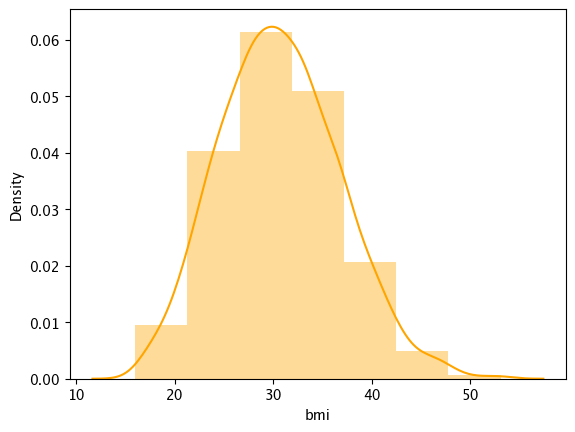

In [28]:
sns.distplot(df["bmi"], bins=7, color="orange")

### "charges" column

In [29]:
df["charges"].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1664b2510>,
 'caps': [<matplotlib.lines.Line2D at 0x1664b2b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1664b0800>],
 'medians': [<matplotlib.lines.Line2D at 0x1664b30b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1664b3350>],
 'means': []}

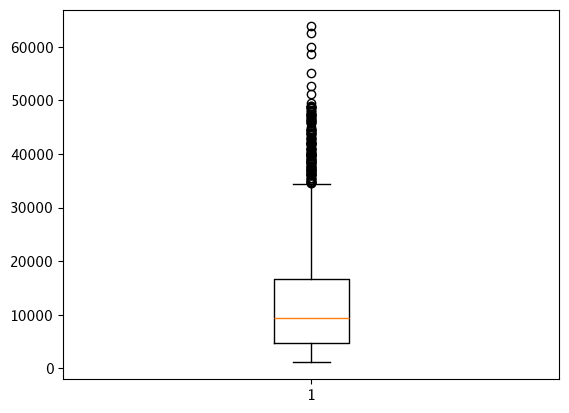

In [30]:
plt.boxplot(df["charges"])

## Multivariate Analysis

### 1. Scatterplot (Numerical - Numerical)

<Axes: xlabel='age', ylabel='bmi'>

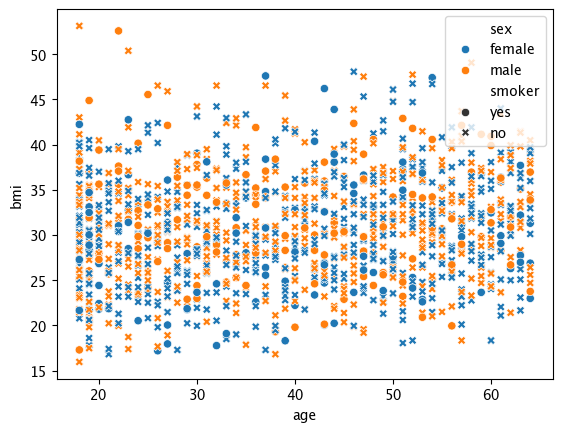

In [31]:
sns.scatterplot(x=df["age"], y=df["bmi"], hue= df["sex"], style=df["smoker"])

### 2. Bar Plot (Numerical - Categorical)

<Axes: xlabel='sex', ylabel='age'>

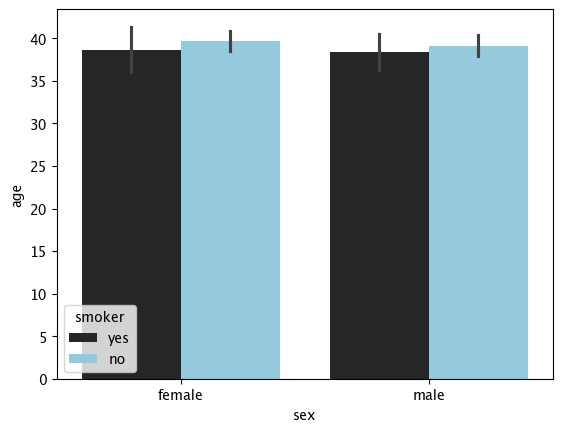

In [32]:
# Average age of different Genders


sns.barplot(df, x="sex", y="age",  hue="smoker", palette='dark:skyblue')

<Axes: xlabel='region', ylabel='age'>

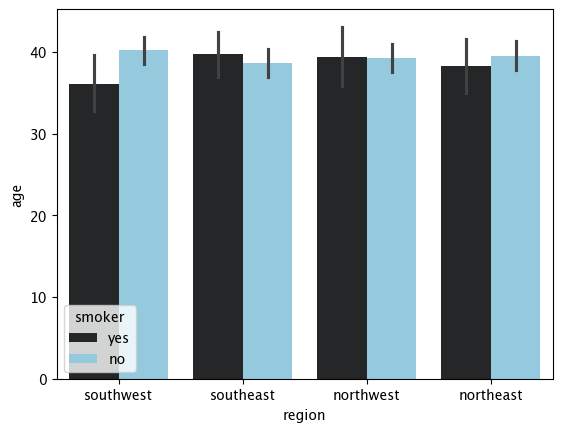

In [33]:
# # Average age of different Region

sns.barplot(df, x="region", y="age", hue="smoker", palette='dark:skyblue')

### 3. Box Plot (Numerical - Categorical)

/var/folders/ff/ns12vyn5245d10w1rgcfkyqw0000gn/T/ipykernel_15690/1537875024.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="sex", y="age", palette="dark:skyblue")


<Axes: xlabel='sex', ylabel='age'>

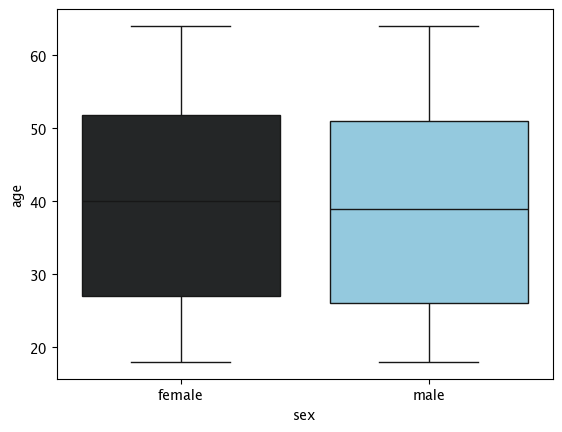

In [34]:
sns.boxplot(df, x="sex", y="age", palette="dark:skyblue")

# Preprocessing


### Input and Output features spliting

In [35]:
x=df.iloc[:, 0:-1]
y=df.iloc[:,-1:]

### Train Test Split

In [36]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [37]:
x_train

,age,sex,bmi,children,smoker,region
1114,23,male,24.510,0,no,northeast
968,21,male,25.745,2,no,northeast
599,52,female,37.525,2,no,northwest
170,63,male,41.470,0,no,southeast
275,47,female,26.600,2,no,northeast
...,...,...,...,...,...,...
1096,51,female,34.960,2,yes,northeast
1131,27,male,45.900,2,no,southwest
1295,20,male,22.000,1,no,southwest
861,38,female,28.000,3,no,southwest


In [38]:
y_train

,charges
1114,2396.09590
968,3279.86855
599,33471.97189
170,13405.39030
275,9715.84100
...,...
1096,44641.19740
1131,3693.42800
1295,1964.78000
861,7151.09200


### One Hot Encoding

In [39]:
from sklearn.compose import ColumnTransformer

In [40]:
transformer=ColumnTransformer(transformers=
                              [("tnf1", OneHotEncoder(sparse_output=False),["sex","smoker","region"])]
                              
                              ,remainder="passthrough"
                              
    )


In [41]:
x_train_transformed = transformer.fit_transform(x_train)
x_test_transformed = transformer.transform(x_test)

x_train_transformed

array([[ 0.   ,  1.   ,  1.   , ..., 23.   , 24.51 ,  0.   ],
       [ 0.   ,  1.   ,  1.   , ..., 21.   , 25.745,  2.   ],
       [ 1.   ,  0.   ,  1.   , ..., 52.   , 37.525,  2.   ],
       ...,
       [ 0.   ,  1.   ,  1.   , ..., 20.   , 22.   ,  1.   ],
       [ 1.   ,  0.   ,  1.   , ..., 38.   , 28.   ,  3.   ],
       [ 1.   ,  0.   ,  1.   , ..., 35.   , 35.86 ,  2.   ]])

In [42]:
feature_names = transformer.get_feature_names_out()

In [43]:
import pandas as pd

x_train_df = pd.DataFrame(x_train_transformed, columns=feature_names)
x_test_df = pd.DataFrame(x_test_transformed, columns=feature_names)

# Training the Models 

## Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_df, y_train)

lr_y_pred=lr.predict(x_test_df)


## Poly-Nomial Regression

In [68]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)

x_train_poly=poly.fit_transform(x_train_df)
x_test_poly=poly.transform(x_test_df)

poly_lr=LinearRegression()
poly_lr.fit(x_train_poly, y_train)

poly_y_pred=poly_lr.predict(x_test_poly)

In [69]:
print("MAE" , mean_absolute_error(y_test,poly_y_pred))

MAE 2981.9855677761198


## SVR 

In [ ]:
from sklearn.svm import SVR

svr=SVR(kernel="linear")
svr.fit(x_train_df, y_train)
svr_y_pred=svr.predict(x_test_df)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Decision Tree

In [74]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=42)
dt.fit(x_train_df,y_train)
dt_y_pred=dt.predict(x_test_df)

## Random Forest Regression

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train_df,y_train)
rf_y_pred=rf.predict(x_test_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


# Model Evaluation

In [78]:
print("Linear Regression Model" , mean_absolute_error(y_test,lr_y_pred))
print("PolyNomial Regression Model" , mean_absolute_error(y_test,poly_y_pred))
print("Soppurt Vector Regression Model" , mean_absolute_error(y_test,svr_y_pred))
print("Desicion Tree Model" , mean_absolute_error(y_test,dt_y_pred))
print("Random Forest Model" , mean_absolute_error(y_test,rf_y_pred))

Linear Regression Model 3933.152604436568
PolyNomial Regression Model 2981.9855677761198
Soppurt Vector Regression Model 7387.422287327192
Desicion Tree Model 2760.9671517126867
Random Forest Model 2572.7115419742536
